In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import pickle
from IPython.display import Image
import pydotplus  

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
cd /content/drive/My Drive/ML Project/LES_RANS

/content/drive/My Drive/ML Project/LES_RANS


In [30]:
ls


'Copy of data_p_time_modelled.csv'    model_uy.json
'Copy of data_ux_time_modelled.csv'   model_uz.h5
'Copy of data_uy_time_modelled.csv'   model_uz.json
'Copy of data_uz_time_modelled.csv'   Random_Forest_LES_RANS.ipynb
 data_ux_time.csv                     RANS_sampling_30.csv
 LES_sampling_030.csv                 rf_ux_1.sav
 MLP_LES_RANS_p.ipynb                 rf_ux_2.sav
 MLP_LES_RANS_ux.ipynb                rf_ux_3.sav
 MLP_LES_RANS_uy.ipynb                rf_ux_4.sav
 MLP_LES_RANS_uz.ipynb                rf_ux_5.sav
 model.h5                             rf_ux_single_1.sav
 model.json                           rf_ux_single_2.sav
 model_p.h5                           rf_ux_single_3.sav
 model_p.json                         rf_ux_single_4.sav
 model_ux.h5                          rf_ux_single_5.sav
 model_ux.json                        SVR_LES_RANS.ipynb
 model_uy.h5                         'Visualize decision tree.ipynb'


In [33]:
filename = 'rf_ux_single_{}.sav'.format(5)
loaded_model = pickle.load(open(filename, 'rb'))
print('Model Loaded')

Model Loaded


In [0]:
# Read Features
X=pd.read_csv('RANS_sampling_30.csv')
X=X.drop(['V', 'U_0:0', 'U_0:1', 'U_0:2','Cell Type','nuTilda','cellID'], axis=1)


# Read dependent variable
#Y=pd.read_csv('Copy of data_ux_time_modelled.csv')
#Y=Y.drop(['cellID','value[0]','value[1]','value[2]','x1[n-1]'],axis=1)

Y=pd.read_csv('LES_sampling_030.csv')
Y=Y.drop(['V', 'U_0:0', 'U_0:1', 'U_0:2','Cell Type','cellID','ccz','ccx','ccy','nut','p','U:1','U:2',],axis=1)
#Y=np.mean(Y.iloc[:, 19:-1],axis=1)

In [0]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle= True, test_size=0.3,random_state=42)
#X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.1, shuffle= True, random_state=42)
# Scalling
scaler = preprocessing.StandardScaler().fit(X_train)
X_train =scaler.transform(X_train)
#X_val =scaler.transform(X_val)
X_test =scaler.transform(X_test)

In [59]:
scaler_pred = preprocessing.StandardScaler().fit(X)
X_pred = scaler_pred.transform(X)
score=loaded_model.score(X_pred,Y)
print('Score: ',(score*100))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.1s


Score:  95.0985266310338


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.5s finished


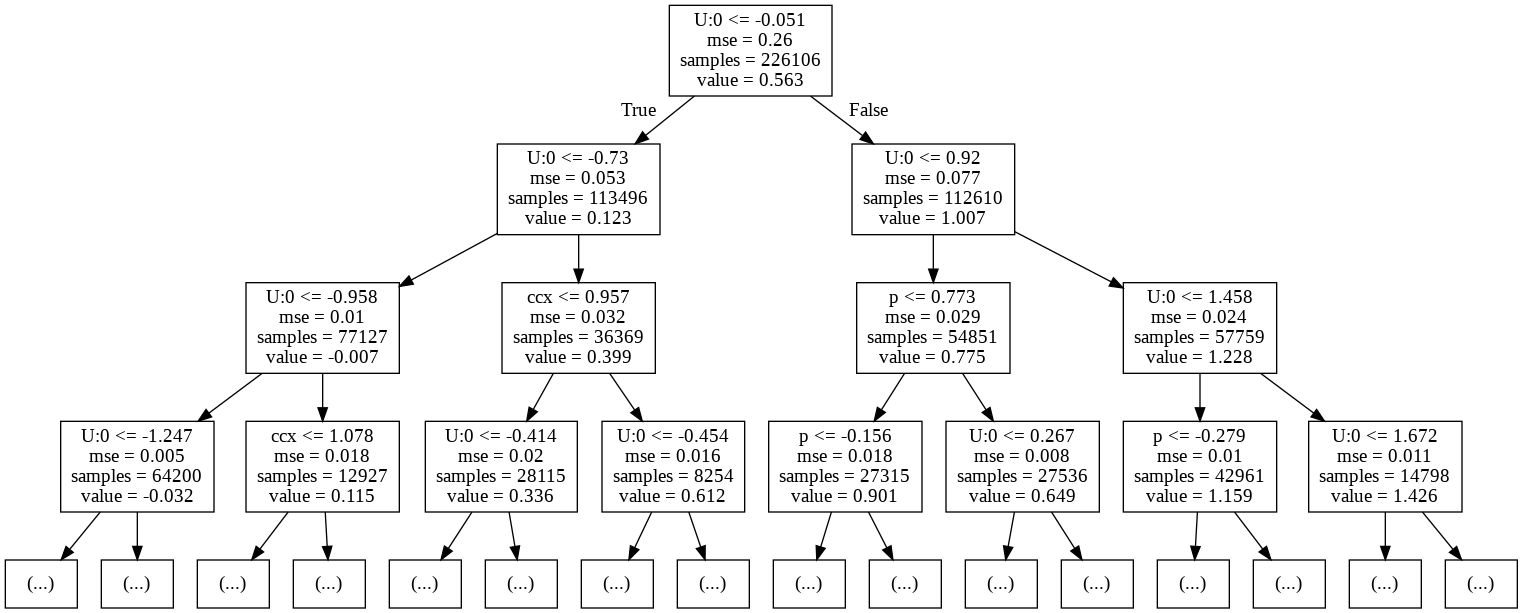

In [70]:
clf = loaded_model[0]
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, max_depth=3,
                                feature_names=list(X.columns))

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())


In [67]:
clf

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1608637542, splitter='best')